In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar100.load_data()
X_train.shape

169001437/169001437 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

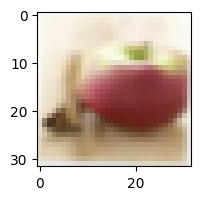

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[2])

Normalizing the values

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100,activation = "softmax"),
])

In [ ]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 3.8141 - accuracy: 0.1144
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 3.2300 - accuracy: 0.2101
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.9750 - accuracy: 0.2562
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.8239 - accuracy: 0.2859
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 2.7243 - accuracy: 0.3069
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 2.6351 - accuracy: 0.3265
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.5698 - accuracy: 0.3365
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 2.5190 - accuracy: 0.3483
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.4609 - accuracy: 0.3610
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [ ]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Loss:",loss)
print("Accuracy:",accuracy*100, "%")

313/313 [==============================] - 4s 13ms/step - loss: 2.5512 - accuracy: 0.3628
Loss 2.5511906147003174
Accuracy: 36.28000020980835 %


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Create a new model that outputs the features from the last convolutional layer
convolutional_layer_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[-3].output)

# Extract features for the training and test sets
train_features = convolutional_layer_model.predict(X_train)
test_features = convolutional_layer_model.predict(X_test)

# Flatten the features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flat)
test_features_scaled = scaler.transform(test_features_flat)

# Flatten the labels
train_labels_flat = y_train.flatten()
test_labels_flat = y_test.flatten()

# Train logistic regression
log_reg = LogisticRegression(max_iter=250)
log_reg.fit(train_features_scaled, train_labels_flat)

# Predict using logistic regression
log_reg_predictions = log_reg.predict(test_features_scaled)

# Calculate accuracy
log_reg_accuracy = accuracy_score(test_labels_flat, log_reg_predictions)
print("Test accuracy using Logistic Regression on extracted features:", log_reg_accuracy*100,"%")


313/313 [==============================] - 4s 11ms/step
Test accuracy using Logistic Regression on extracted features: 19.09 %
